# 用平均距离做的一个聚类的代码

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram

warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('poisson_result.csv').iloc[:,1:]
df

,27Al,48Ti,51V,58Fe,60Ni,66Zn,75As,89Y,112Sn,121Sb,...,153Eu,157Gd,159Tb,163Dy,165Ho,166Er,169Tm,172Yb,175Lu,207Pb
0,4700000.0,2010000.0,3930000.0,4300000.0,3450000.0,3560000.0,1790000.0,1420000.0,442000.0,1200000.0,...,467000.0,604000.0,523000.0,522000.0,511000.0,467000.0,346000.0,1560000.0,375000.0,3150000.0
1,3520000.0,1210000.0,3250000.0,2850000.0,1350000.0,1960000.0,688000.0,495000.0,151000.0,438000.0,...,169000.0,71500.0,182000.0,144000.0,190000.0,129000.0,127000.0,158000.0,126000.0,1340000.0
2,3270000.0,1290000.0,1950000.0,3120000.0,1230000.0,590000.0,733000.0,265000.0,88900.0,371000.0,...,67000.0,63400.0,65500.0,59400.0,52700.0,51300.0,48000.0,61100.0,45300.0,271000.0
3,5240000.0,3730000.0,2020000.0,3670000.0,1630000.0,4040000.0,807000.0,866000.0,182000.0,570000.0,...,155000.0,165000.0,139000.0,167000.0,135000.0,130000.0,80100.0,198000.0,75200.0,2810000.0
4,1970000.0,1240000.0,2770000.0,1920000.0,1210000.0,1790000.0,729000.0,476000.0,273000.0,882000.0,...,249000.0,235000.0,162000.0,172000.0,123000.0,119000.0,78400.0,331000.0,81100.0,1630000.0
5,2640000.0,2220000.0,2860000.0,2610000.0,1590000.0,2180000.0,1240000.0,650000.0,268000.0,948000.0,...,274000.0,204000.0,286000.0,195000.0,207000.0,156000.0,252000.0,307000.0,248000.0,1760000.0
6,3770000.0,3410000.0,3670000.0,3040000.0,1960000.0,1930000.0,1340000.0,1310000.0,335000.0,986000.0,...,444000.0,251000.0,311000.0,308000.0,304000.0,226000.0,269000.0,182000.0,282000.0,406000.0
7,3700000.0,1820000.0,3210000.0,1540000.0,749000.0,1460000.0,2580000.0,604000.0,223000.0,738000.0,...,945000.0,422000.0,309000.0,303000.0,223000.0,224000.0,169000.0,244000.0,136000.0,1430000.0
8,3100000.0,2410000.0,3220000.0,2940000.0,1730000.0,1440000.0,1380000.0,776000.0,290000.0,1500000.0,...,395000.0,252000.0,222000.0,247000.0,197000.0,185000.0,143000.0,402000.0,146000.0,1920000.0
9,2290000.0,2760000.0,2320000.0,1740000.0,847000.0,723000.0,783000.0,460000.0,180000.0,756000.0,...,83200.0,74000.0,71400.0,93400.0,62500.0,64200.0,55400.0,111000.0,58400.0,547000.0


In [59]:
feature = np.array(pd.read_csv("poisson_result.csv").iloc[:,0])
print(len(feature))
feature

53


array(['背', '上', '下', '田2', '降', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7',
       'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D18',
       "D18'", 'D18-19', 'D19', "D19'", 'D20', "D20'", 'D20-21', 'D21',
       "D21'", 'D22', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30',
       'D31', '江管', '江1', '江2', '江3', '江4', '江5', '江6', '江7', '江8', '江9',
       '江10', '江12', '江13'], dtype=object)

In [74]:
labels = range(53)
labels

range(0, 53)

In [76]:
if(len(feature) != 1):
    dist_matrix = pd.DataFrame(squareform(pdist(df, metric="euclidean")), columns=labels, index=labels)

# pdist:计算两两之间的距离
# squareform:将距离数组转化为方阵  
    
print(dist_matrix.shape)
dist_matrix

(53, 53)


,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.000000e+00,5.058636e+06,6.453333e+06,4.021983e+06,5.579525e+06,4.481308e+06,4.562707e+06,5.416387e+06,4.222939e+06,6.823208e+06,...,6.463633e+06,6.833795e+06,6.517099e+06,9.451383e+06,6.090071e+06,7.920236e+06,7.458985e+06,6.544558e+06,7.339556e+06,7.639243e+06
1,5.058636e+06,0.000000e+00,2.240168e+06,4.634705e+06,2.343769e+06,2.052905e+06,3.043614e+06,4.176417e+06,2.387508e+06,2.953276e+06,...,4.965948e+06,6.355071e+06,7.097879e+06,9.899997e+06,5.191723e+06,7.351522e+06,5.201448e+06,4.819375e+06,6.319877e+06,6.183089e+06
2,6.453333e+06,2.240168e+06,0.000000e+00,5.661095e+06,2.996357e+06,3.059815e+06,3.686360e+06,4.640923e+06,3.208077e+06,2.382491e+06,...,5.578358e+06,7.112964e+06,8.069129e+06,1.062844e+07,5.971343e+06,7.961991e+06,5.503359e+06,5.460271e+06,6.970959e+06,6.498207e+06
3,4.021983e+06,4.634705e+06,5.661095e+06,0.000000e+00,5.272617e+06,4.062021e+06,4.188933e+06,5.386640e+06,4.232756e+06,5.704560e+06,...,6.799556e+06,8.259734e+06,7.991098e+06,1.012061e+07,7.051995e+06,8.624883e+06,7.656148e+06,7.297247e+06,8.009246e+06,7.329478e+06
4,5.579525e+06,2.343769e+06,2.996357e+06,5.272617e+06,0.000000e+00,1.621167e+06,3.687859e+06,3.559197e+06,2.335697e+06,2.470780e+06,...,4.913815e+06,5.892089e+06,7.240359e+06,1.034022e+07,4.869405e+06,7.538929e+06,5.144083e+06,4.481308e+06,6.445491e+06,6.436718e+06
5,4.481308e+06,2.052905e+06,3.059815e+06,4.062021e+06,1.621167e+06,0.000000e+00,2.486329e+06,3.329402e+06,1.241783e+06,2.599675e+06,...,4.420778e+06,5.612832e+06,6.531396e+06,9.479891e+06,4.521918e+06,6.934319e+06,4.940950e+06,4.313252e+06,5.926590e+06,5.830989e+06
6,4.562707e+06,3.043614e+06,3.686360e+06,4.188933e+06,3.687859e+06,2.486329e+06,0.000000e+00,3.808577e+06,2.218585e+06,3.329501e+06,...,4.023083e+06,5.715350e+06,5.916854e+06,8.175487e+06,4.707035e+06,6.130611e+06,4.745834e+06,4.645528e+06,5.366499e+06,4.704089e+06
7,5.416387e+06,4.176417e+06,4.640923e+06,5.386640e+06,3.559197e+06,3.329402e+06,3.808577e+06,0.000000e+00,3.217000e+06,4.215302e+06,...,4.087005e+06,5.453173e+06,5.956726e+06,8.687152e+06,4.401020e+06,6.177044e+06,4.555209e+06,4.184430e+06,5.462138e+06,5.122627e+06
8,4.222939e+06,2.387508e+06,3.208077e+06,4.232756e+06,2.335697e+06,1.241783e+06,2.218585e+06,3.217000e+06,0.000000e+00,2.889760e+06,...,3.905380e+06,5.184863e+06,5.878280e+06,8.749747e+06,4.054566e+06,6.296010e+06,4.535912e+06,3.995400e+06,5.350375e+06,5.235222e+06
9,6.823208e+06,2.953276e+06,2.382491e+06,5.704560e+06,2.470780e+06,2.599675e+06,3.329501e+06,4.215302e+06,2.889760e+06,0.000000e+00,...,4.678005e+06,6.443336e+06,7.591155e+06,9.903037e+06,5.360740e+06,7.241216e+06,4.659874e+06,4.802331e+06,6.234354e+06,5.481738e+06


In [67]:
# linkage是scipy自带的层次聚类算法, 输入: 
# 输出结果包含4个字段：
# 第一字段和第二字段分别为聚类簇的编号
# 第三字段变是前两个聚类簇间的距离
# 第四字段表示新生成聚类簇包含的元素个数
result_clusters=linkage(dist_matrix.values, method = "complete", metric = "euclidean")
clusters = pd.DataFrame(result_clusters, columns=["label 1","label 2","distance","sampleSize"],
                        index=["cluster %d"%(i+1) for i in range(result_clusters.shape[0])])
clusters

,label 1,label 2,distance,sampleSize
cluster 1,17.0,18.0,1.040617e+06,2.0
cluster 2,25.0,53.0,1.417724e+06,3.0
cluster 3,26.0,33.0,1.571671e+06,2.0
cluster 4,10.0,36.0,2.046805e+06,2.0
cluster 5,8.0,12.0,2.645107e+06,2.0
cluster 6,37.0,54.0,2.670793e+06,4.0
cluster 7,23.0,55.0,2.685424e+06,3.0
cluster 8,21.0,38.0,2.997193e+06,2.0
cluster 9,15.0,29.0,3.047811e+06,2.0
cluster 10,13.0,30.0,3.200425e+06,2.0


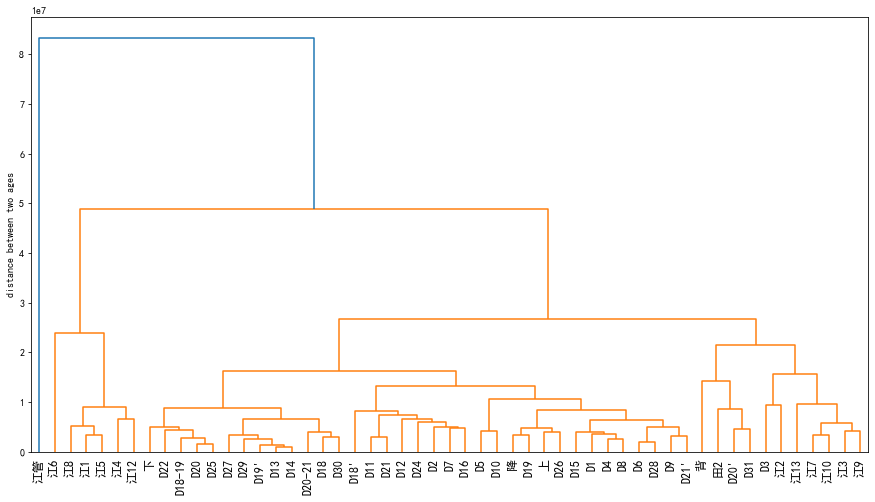

In [83]:
# dendrogram:画出层级聚类的树状图
plt.figure(figsize=(15,8))
dendr = dendrogram(result_clusters, labels=feature, orientation='top',leaf_rotation=90.0, leaf_font_size=12)
plt.ylabel("distance between two ages")
plt.savefig("result.png")
# plt.rcParams["font.sans-serif"]="SimHei"
# plt.rcParams["axes.unicode_minus"]=False
plt.show()

In [20]:
# fcluster:输出每个样本所在簇的id
x = fcluster(result_clusters, t=1, criterion='inconsistent')
print(len(x))
x

53


array([14, 10,  4, 14,  9, 11,  7, 15, 11,  8, 12,  7, 11, 13,  8,  7,  7,
        5,  5, 11,  7,  6,  7,  4,  9,  5,  4, 14,  6,  7, 13,  4,  7,  4,
       10,  5, 12,  5,  6, 14, 19,  1, 15, 17,  2,  1,  3, 16,  1, 17, 16,
        2, 18], dtype=int32)

In [21]:
feature

array(['背', '上', '下', '田2', '降', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7',
       'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D18',
       "D18'", 'D18-19', 'D19', "D19'", 'D20', "D20'", 'D20-21', 'D21',
       "D21'", 'D22', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30',
       'D31', '江管', '江1', '江2', '江3', '江4', '江5', '江6', '江7', '江8', '江9',
       '江10', '江12', '江13'], dtype=object)

In [28]:
res = list(zip(x,feature))
res.sort(key=lambda x: x[0])
res = pd.DataFrame(res)
res

,0,1
0,1,江1
1,1,江5
2,1,江8
3,2,江4
4,2,江12
5,3,江6
6,4,下
7,4,D18-19
8,4,D20
9,4,D22
